## Sample of plots using util.ipynb
These are usage examples. The stock data is in `Data` folder and assumes Yahoo Finance EOD is in use. 
The data retrieved uses `Adjusted Close` prices.
`SPY` is automatically included but any number of stock symbols can be used.

In [1]:
%run util.ipynb

In [2]:
dates = pd.date_range('2018-01-01','2018-09-27')
df_data = get_data(['TSLA','MSFT'],dates)

In [3]:
plt.figure(figsize=(20,20))
plot_bollinger_bands(df_data,'TSLA',window=20)

In [4]:
prices = get_data(['TSLA'],dates)

In [5]:
returns = daily_returns(prices)

In [6]:
plot_data(returns['TSLA'], 'TSLA')

In [7]:
returns['TSLA'].hist(bins=20)
returns['SPY'].hist(bins=20)
plt.legend()

In [8]:
returns.plot(kind='scatter',x='SPY', y='TSLA')

beta and alpha can be calculated with numpy. Y = mx + b where x is the base (SPY) and the Symbol compared (TSLA) is y
 m = beta and b = alpha, therefore TSLA plot = beta * returns of SPY + alpha

In [9]:
beta,alpha = np.polyfit(returns['SPY'],returns['TSLA'],1)
plt.plot(returns['TSLA'], beta*returns['SPY'] + alpha, '-', color='r')

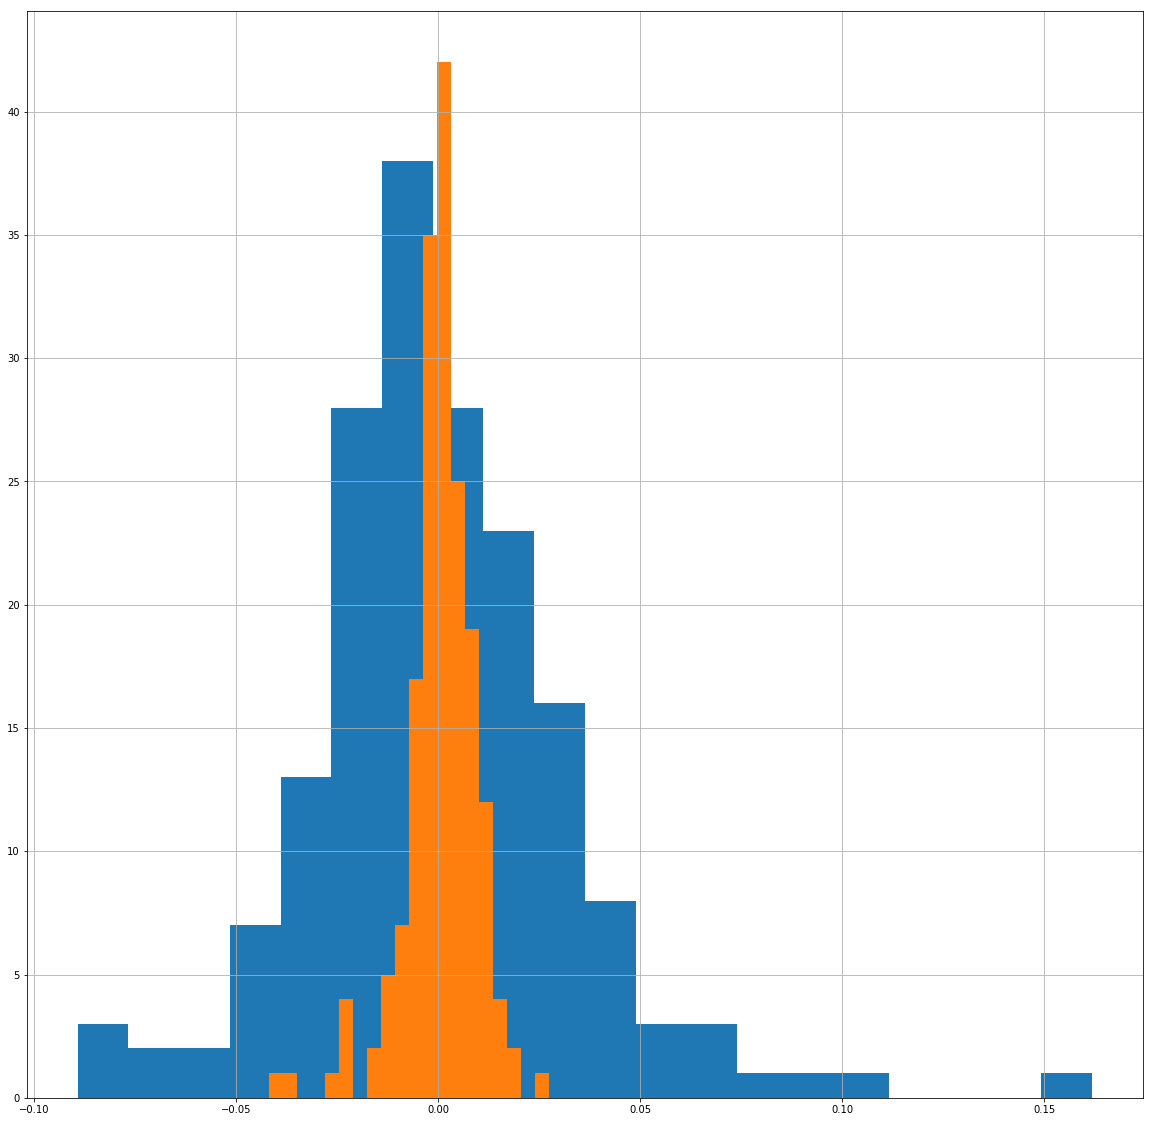

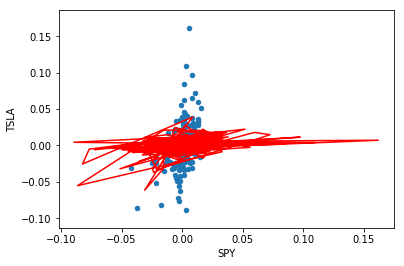

In [10]:
plt.show()

In [11]:
alpha, beta

(-0.00069794370429325102, 1.4543944439826908)

## Lazy trader
Lets make a dumb assumption and say we should go with bollinger bands and we need signal there to long/short and surf around

In [12]:
rm = get_rolling_mean(prices['TSLA'],window=20)
rstd = get_rolling_std(prices['TSLA'],window=20)
upper, lower = get_bollinger_bands(rm, rstd)
# This is not telling us if we actually crossed over, just that we are outside the bands
signal_long = prices['TSLA'] < lower 
signal_short = prices['TSLA'] > upper
long = signal_long.astype(np.float64)
#False = 0 so -1 from it to get negative
short = signal_short.astype(np.float64) - 1


In [13]:
#should I short today?
signal_short[-1] * prices['TSLA'][-1]

0.0

In [14]:
#should I go long today?
signal_long[-1] * prices['TSLA'][-1]

0.0

In [15]:
#whats the current lower band so I can set a limit buy
lower[-1]

265.47355155525605

In [16]:
#Lets backtest
long_positions = prices['TSLA'] * signal_long
long_positions[long_positions != 0]


2018-02-08    315.230011
2018-02-09    310.420013
2018-03-27    279.179993
2018-03-28    257.779999
2018-03-29    266.130005
2018-04-02    252.479996
2018-07-30    290.170013
2018-09-07    263.239990
Name: TSLA, dtype: float64

In [17]:
#all short positions same as long
short_positions = prices['TSLA'] * signal_short
short_positions[short_positions != 0]


2018-06-06    319.500000
2018-06-07    316.089996
2018-06-08    317.660004
2018-06-11    332.100006
2018-06-12    342.769989
2018-06-13    344.779999
2018-06-14    357.720001
2018-08-02    349.540009
2018-08-03    348.170013
2018-08-07    379.570007
Name: TSLA, dtype: float64